## Thinking about your project with one of the most famous transport networks of all: The Tube

Explore the dataset of the London Tube network published by Nicola Greco on their Github page: https://github.com/nicola/tubemaps

In [21]:
import pandas as pd

#vertices (stations)
url_V="https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.stations.csv"
df_V=pd.read_csv(url_V)
# df_V.head()

#edges (connections between stations)
url_E="https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.connections.csv"
df_E=pd.read_csv(url_E)
#df_V.head()

In [28]:
#you're familiar with dictionaries so let's stick with them for the moment...

dict_V = dict([(i,(x,y)) for i, x,y in zip(df_V.name, df_V.latitude, df_V.longitude)])
dict_names = dict([(id,i) for id,i in zip(df_V.id,df_V.name)])

dict_E = dict([((i,j), w) for i,j,w in zip(df_E.station1.map(dict_names), df_E.station2.map(dict_names), df_E.time)])

In [23]:
dict_E    #路径

{('Baker Street', 'Marylebone'): 1,
 ('Baker Street', "Regent's Park"): 2,
 ('Charing Cross', 'Embankment'): 1,
 ('Charing Cross', 'Picadilly Circus'): 2,
 ('Edgware Road (B)', 'Marylebone'): 2,
 ('Edgware Road (B)', 'Paddington'): 3,
 ('Elephant & Castle', 'Lambeth North'): 3,
 ('Embankment', 'Waterloo'): 2,
 ('Harlesden', 'Stonebridge Park'): 2,
 ('Harlesden', 'Willesden Junction'): 2,
 ('Harrow & Wealdston', 'Kenton'): 2,
 ('Kensal Green', "Queen's Park"): 3,
 ('Kensal Green', 'Willesden Junction'): 3,
 ('Kenton', 'South Kenton'): 2,
 ('Kilburn Park', 'Maida Vale'): 2,
 ('Kilburn Park', "Queen's Park"): 2,
 ('Lambeth North', 'Waterloo'): 1,
 ('Maida Vale', 'Warwick Avenue'): 1,
 ('North Wembley', 'South Kenton'): 2,
 ('North Wembley', 'Wembley Central'): 2,
 ('Oxford Circus', 'Picadilly Circus'): 2,
 ('Oxford Circus', "Regent's Park"): 2,
 ('Paddington', 'Warwick Avenue'): 2,
 ('Stonebridge Park', 'Wembley Central'): 3,
 ('Bank', 'Liverpool Street'): 2,
 ('Bank', "St. Paul's"): 2,
 

In [24]:
dict_V   #坐标

{'Acton Town': (51.5028, -0.2801),
 'Aldgate': (51.5143, -0.0755),
 'Aldgate East': (51.5154, -0.0726),
 'All Saints': (51.5107, -0.013),
 'Alperton': (51.5407, -0.2997),
 'Angel': (51.5322, -0.1058),
 'Archway': (51.5653, -0.1353),
 'Arnos Grove': (51.6164, -0.1331),
 'Arsenal': (51.5586, -0.1059),
 'Baker Street': (51.5226, -0.1571),
 'Balham': (51.4431, -0.1525),
 'Bank': (51.5133, -0.0886),
 'Barbican': (51.5204, -0.0979),
 'Barking': (51.5396, 0.081),
 'Barkingside': (51.5856, 0.0887),
 'Barons Court': (51.4905, -0.2139),
 'Bayswater': (51.5121, -0.1879),
 'Beckton': (51.5148, 0.0613),
 'Beckton Park': (51.5087, 0.055),
 'Becontree': (51.5403, 0.127),
 'Belsize Park': (51.5504, -0.1642),
 'Bethnal Green': (51.527, -0.0549),
 'Blackfriars': (51.512, -0.1031),
 'Blackhorse Road': (51.5867, -0.0417),
 'Blackwall': (51.5079, -0.0066),
 'Bond Street': (51.5142, -0.1494),
 'Borough': (51.5011, -0.0943),
 'Boston Manor': (51.4956, -0.325),
 'Bounds Green': (51.6071, -0.1243),
 'Bow Churc

import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(dict_V)
G.add_edges_from(dict_E)

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(dict_V)
G.add_edges_from(dict_E)

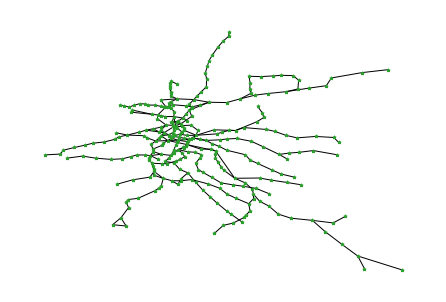

In [45]:
nx.draw(G, dict_V, 
        node_color='C2', 
        node_shape='*', 
        node_size=10, 
        with_labels=False, font_size=8)

# Graph properties

In [43]:
nx.average_neighbor_degree(G)
nx.communicability(G) #Will take some time to compute
nx.cycle_basis(G)[1]

['Tottenham Court Road', 'Leicester Square', 'Covent Garden', 'Holborn']

### Some questions to guide your exploration...
* Clearly the network is not [random](https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap02.ipynb) - can you show that?
* Is it [small-world](https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap03.ipynb)? [scale-free](https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap04.ipynb)? Why would these be good/bad for such a transport network?

* What properties would a good transport network have? How can you quantify them?

* Reflect: Suppose we know what is the optimal architecture of a good transport network for a particular city, what other factors would influence the implementation of such network?

To do:

* The actual tube map is a work of art (I know, I've tried to make one mapping the different areas of mathematics before and it was no easy task!). Consider how to make your network prettier, e.g. you might try to colour edges based on the tube line (there is a separate dataset london.lines.csv for this). You might also like to tinker with Gephi.
* Find your own dataset and practice manipulating it into the form you need. Search more transportation datasets and read the documentation. For example:
    * https://freegisdata.rtwilson.com/

* Try create your graph from a Dataframe instead of a dictionary.

# Making the graph prettier

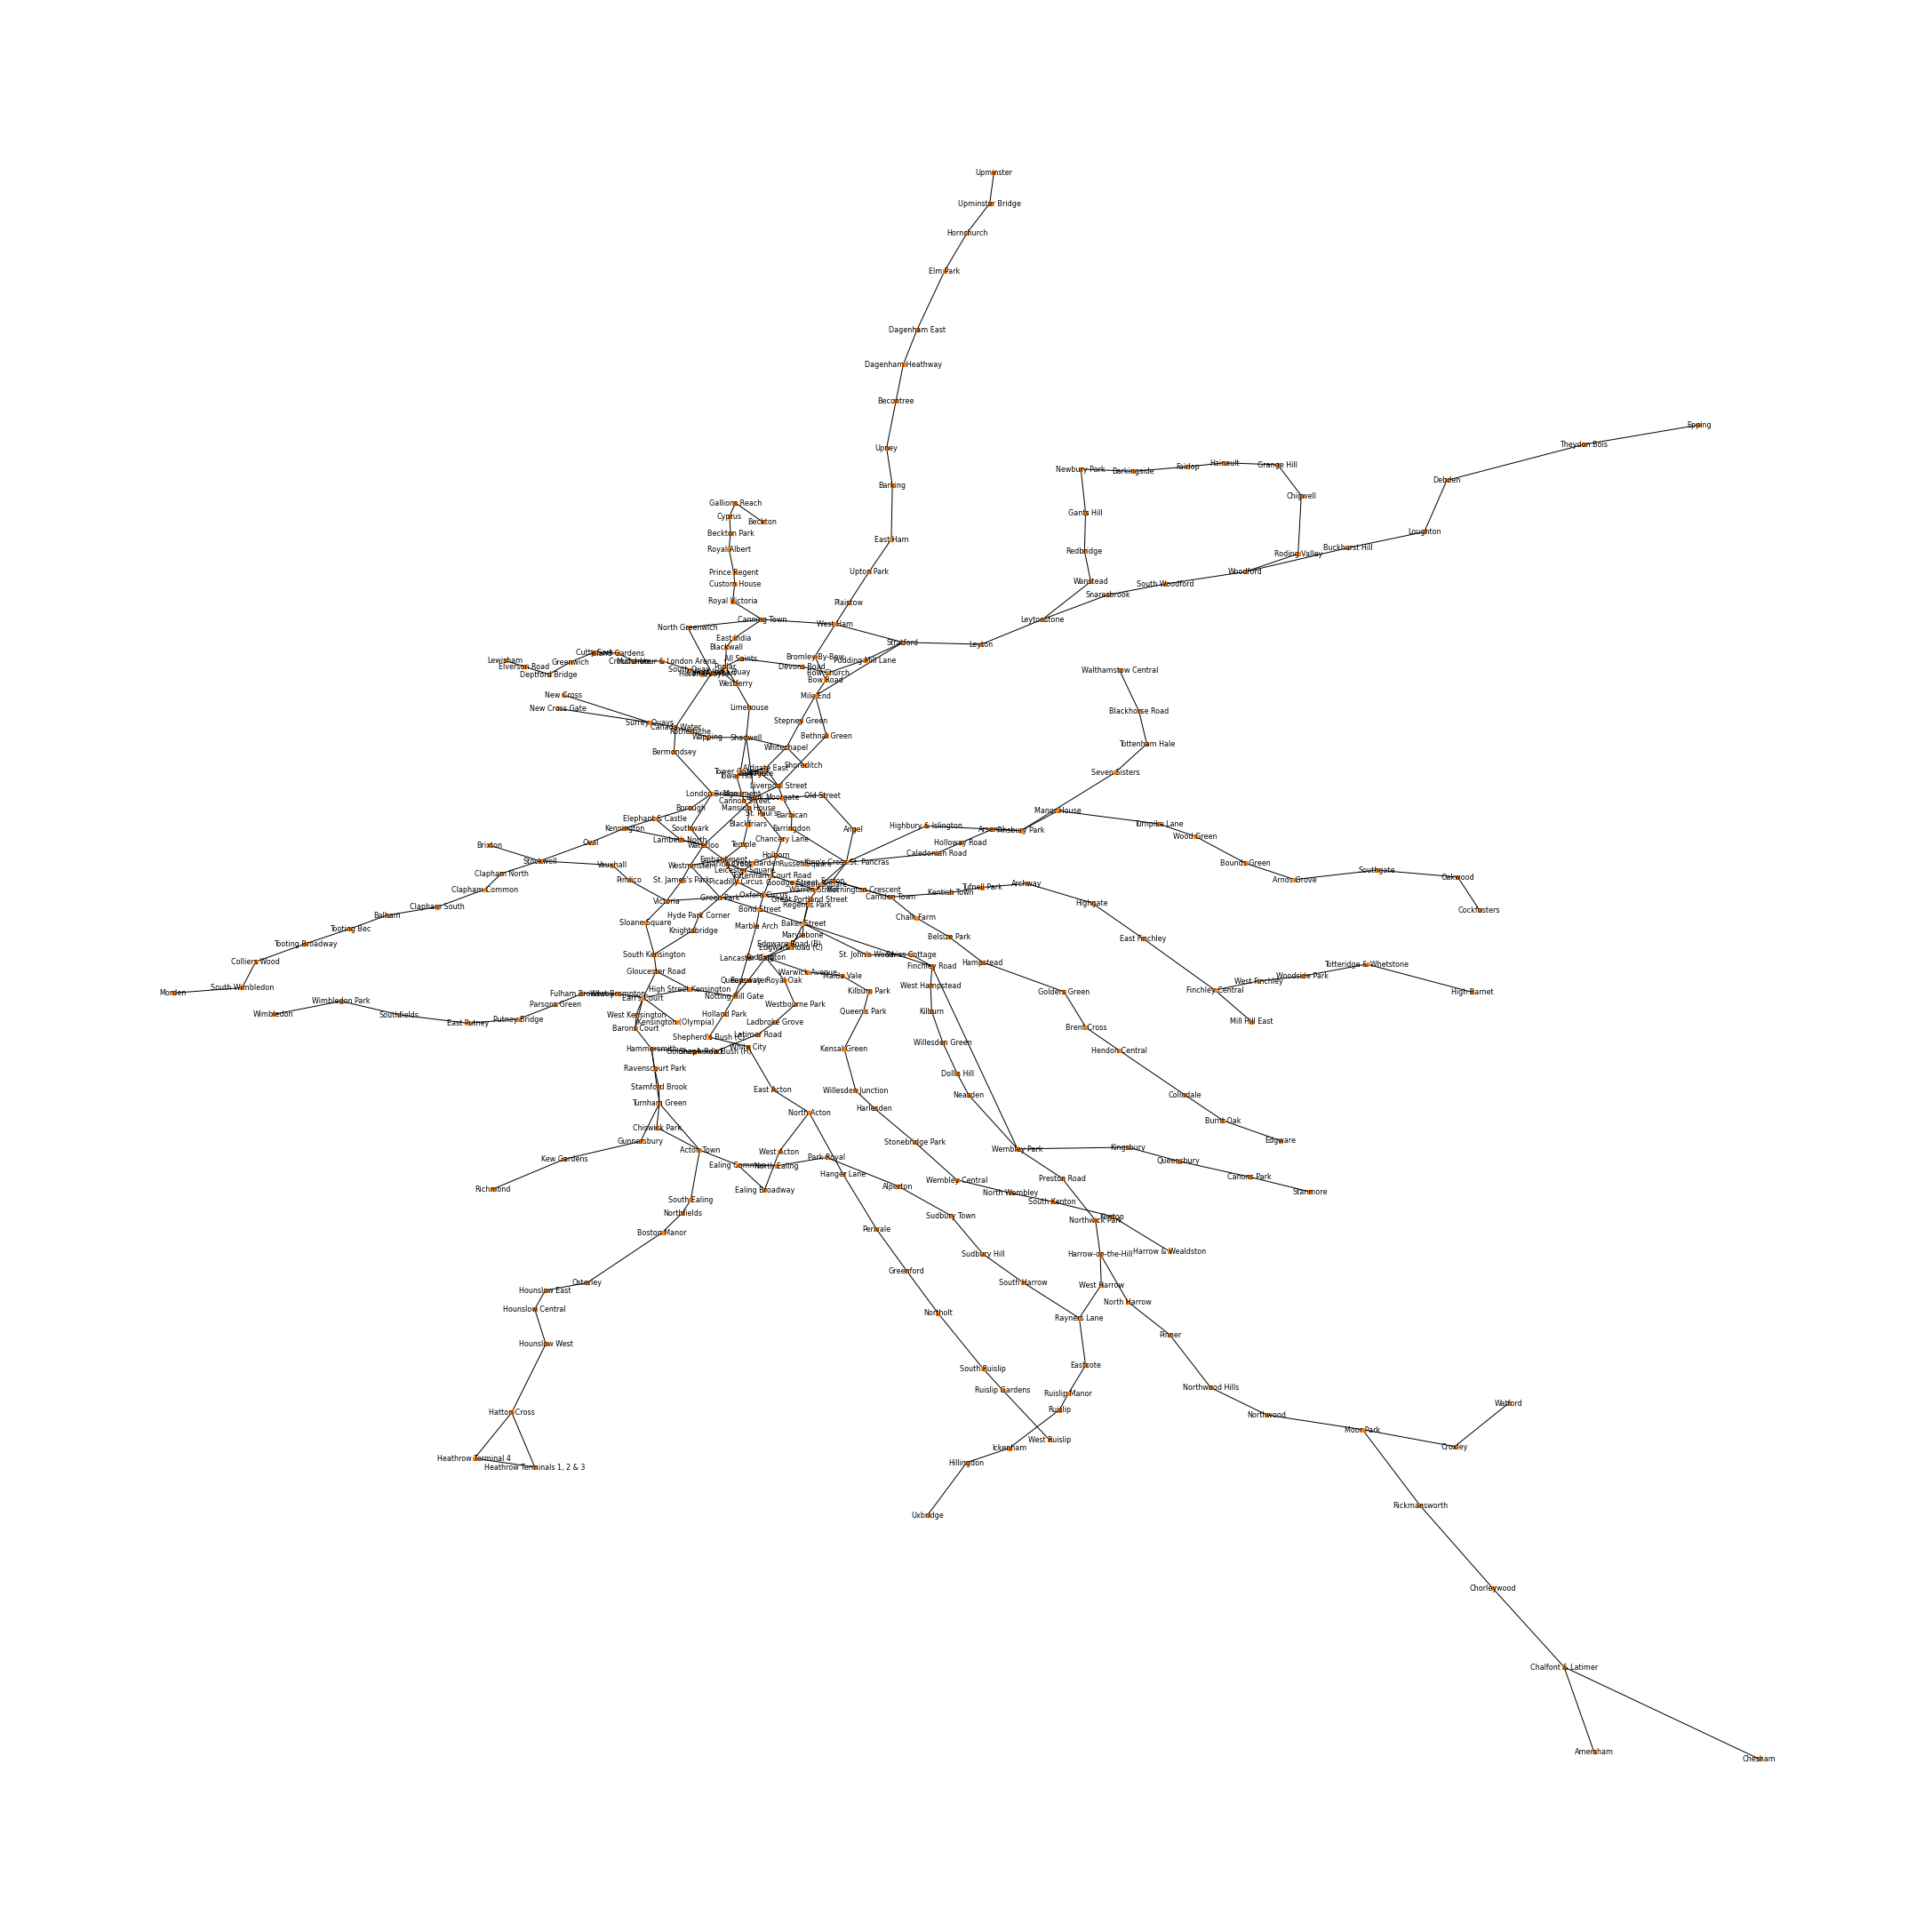

In [46]:
plt.figure(figsize=(30,30)) 
nx.draw(G, dict_V, 
        node_color='C1', 
        node_shape='s', 
        node_size=10, 
        with_labels=True, font_size=8)